In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Projekt_2 import nmk_lin_mod_stat, nmk_nlin_mod_stat, model_stat_error, lin_mod_stat_func,nlin_mod_stat_func

# Wczytanie i podział danych statycznych na zbiór uczący i weryfikujący.

In [2]:
dane_stat = np.loadtxt('dane/danestat13.txt')
dane_ucz = dane_stat[::2]
dane_wer = dane_stat[1::2]
print(dane_wer.shape)

(100, 2)


# Rysowanie wykresów zbirów uczącego i weryfikującego

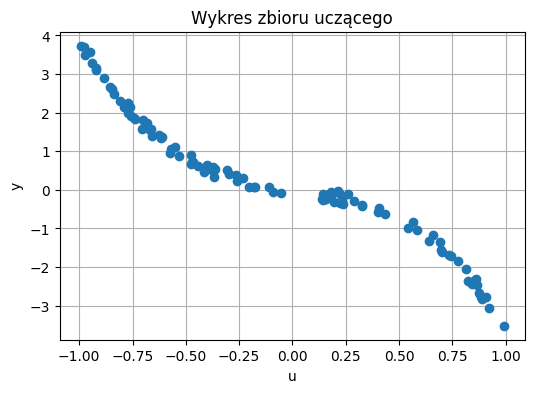

In [3]:
plt.figure(figsize=(6, 4))
plt.plot(dane_ucz[:,0],dane_ucz[:,1], 'o')
plt.title('Wykres zbioru uczącego')
plt.xlabel('u')
plt.ylabel('y')
plt.grid(True)
path='wykresy/dane_stat_ucz.png'
plt.savefig(path,dpi=300)
plt.show()

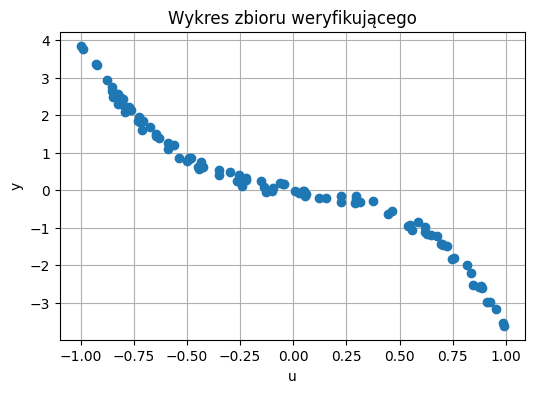

In [4]:
plt.figure(figsize=(6, 4))
plt.plot(dane_wer[:,0],dane_wer[:,1],'o')
plt.title('Wykres zbioru weryfikującego')
plt.xlabel('u')
plt.ylabel('y')
plt.grid(True)
path='wykresy/dane_stat_wer.png'
plt.savefig(path,dpi=300)
plt.show()

# Statyczny model liniowy metodą najmiejszych kwadratów
## Wyznaczanie parametrów

In [5]:
M=np.column_stack((np.ones(dane_ucz.shape[0]), dane_ucz[:,0]))
Y=dane_ucz[:,1][:, np.newaxis]

In [6]:
# a=np.dot(np.dot(np.linalg.inv(np.dot(M.T, M)), M.T), Y)
a=nmk_lin_mod_stat(dane_ucz[:,0][:, np.newaxis],dane_ucz[:,1][:, np.newaxis])
print(a)

[[ 0.02025505]
 [-2.64977843]]


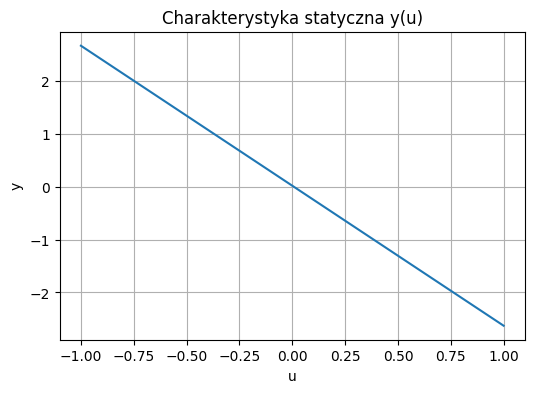

In [7]:
u_vals = np.linspace(-1,1,100)
def func(x):
    return a[0]+a[1]*x

plt.figure(figsize=(6, 4))
plt.plot(u_vals,np.vectorize(func)(u_vals))

plt.title('Charakterystyka statyczna y(u)')
plt.xlabel('u')
plt.ylabel('y')
plt.grid(True)
plt.show()

## Sprawdzenie poprawności rozwiązania

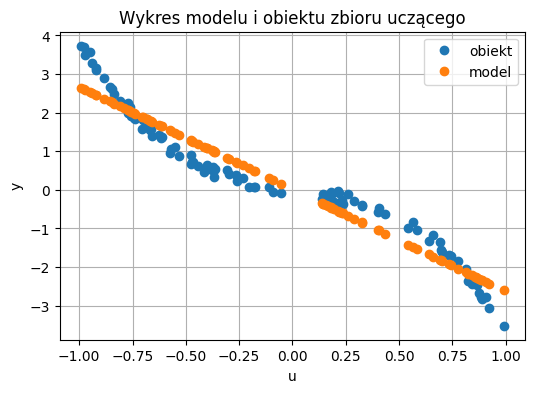

In [8]:
def func(x):
    return a[0]+a[1]*x

plt.figure(figsize=(6, 4))
plt.plot(dane_ucz[:,0],dane_ucz[:,1], 'o', label='obiekt')
plt.plot(dane_ucz[:,0],np.vectorize(func)(dane_ucz[:,0]), 'o', label='model')
plt.title('Wykres modelu i obiektu zbioru uczącego')
plt.xlabel('u')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

(100, 2)
(1, 100)


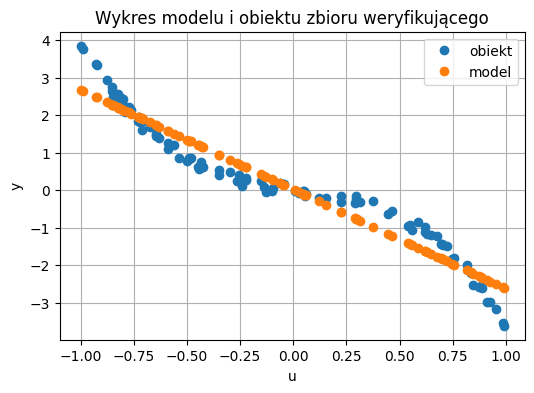

In [9]:
def func(x):
    return a[0]+a[1]*x

plt.figure(figsize=(6, 4))
plt.plot(dane_wer[:,0],dane_wer[:,1], 'o', label='obiekt')
plt.plot(dane_wer[:,0],np.vectorize(func)(dane_wer[:,0]), 'o', label='model')
print(dane_wer.shape)
print(np.array([func(x) for x in dane_wer[:,0]]).T.shape)
plt.title('Wykres modelu i obiektu zbioru weryfikującego')
plt.xlabel('u')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

##  Wyznaczenie błędów

In [10]:
error_ucz_sum = model_stat_error(dane_ucz[:,0], dane_ucz[:,1], lin_mod_stat_func, a)
error_wer_sum = model_stat_error(dane_wer[:,0], dane_wer[:,1], lin_mod_stat_func, a)

print(error_ucz_sum)
print(error_wer_sum)
errors=np.array([error_ucz_sum])
errors=np.column_stack((errors,error_wer_sum))
header = "Dane uczące,Dane weryfikujące"
np.savetxt("wyniki_csv/bledy_mod_lin.csv", errors, delimiter=",", header=header, comments='', fmt='%.2f')

20.05384614186182
20.107627182931726


# Statyczny model nieliniowy metodą najmieszych kwadratów
## Wyznaczanie parametrów

In [11]:
N=6
print(N)

6


In [12]:
a=np.zeros((N+1,N))

for n in range(1,N+1):
    a_temp=nmk_nlin_mod_stat(dane_ucz[:,0][:, np.newaxis],dane_ucz[:,1][:, np.newaxis],n)
    a[0:n+1,n-1]=a_temp.ravel()
print(a)

[[ 2.02550469e-02 -1.05642294e-01 -5.21992403e-03 -3.26520184e-02
  -3.26601713e-02 -4.34156623e-02]
 [-2.64977843e+00 -2.63924171e+00 -8.91604433e-01 -8.63446184e-01
  -8.64010766e-01 -8.51144568e-01]
 [ 0.00000000e+00  3.34121091e-01  1.55457773e-01  4.09813261e-01
   4.09979552e-01  5.94504989e-01]
 [ 0.00000000e+00  0.00000000e+00 -2.85040264e+00 -2.89400208e+00
  -2.89135643e+00 -2.93623956e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.94850943e-01
  -2.95095082e-01 -8.08348962e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -2.42746554e-03  3.68249092e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  3.65006435e-01]]


## Wyznaczanie błędów

In [13]:
error_ucz_sum = np.zeros((N,1))
error_wer_sum = np.zeros((N,1))
for n in range(1, N+1):
    error_ucz_sum[n-1, 0] = model_stat_error(dane_ucz[:,0], dane_ucz[:,1], nlin_mod_stat_func, a[:n+1,n-1])
    error_wer_sum[n-1, 0] = model_stat_error(dane_wer[:,0], dane_wer[:,1], nlin_mod_stat_func, a[:n+1,n-1])

print(error_ucz_sum)
print(error_wer_sum)

errors=np.array([range(1,N+1)]).T
errors=np.column_stack((errors,error_ucz_sum))
errors=np.column_stack((errors,error_wer_sum))

header = "Stopień wielomianu,Dane uczące,Dane weryfikujące"
np.savetxt("wyniki_csv/bledy_mod_nlin.csv", errors, delimiter=",", header=header, comments='', fmt='%d, %.2f, %.2f')

[[20.05384614]
 [19.07334355]
 [ 0.8853028 ]
 [ 0.84244263]
 [ 0.84244171]
 [ 0.83841872]]
[[20.10762718]
 [19.83693215]
 [ 1.00098571]
 [ 0.91257765]
 [ 0.91247167]
 [ 0.92879668]]


## Wykresy


#### Generowanie charakterystyk

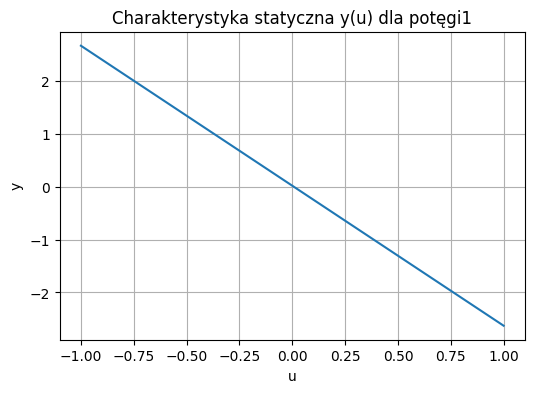

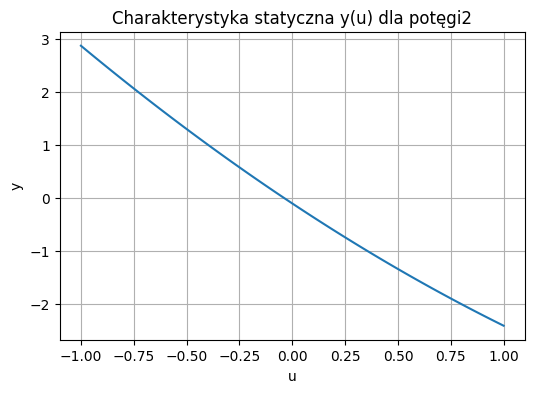

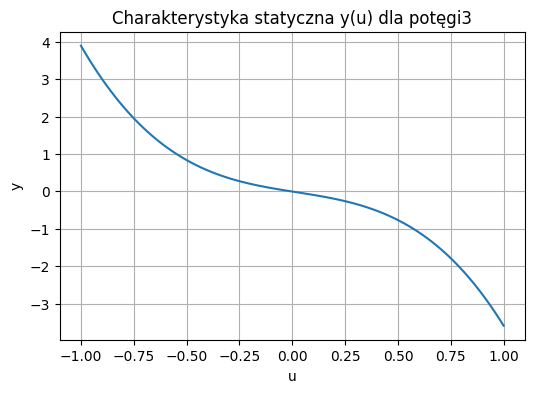

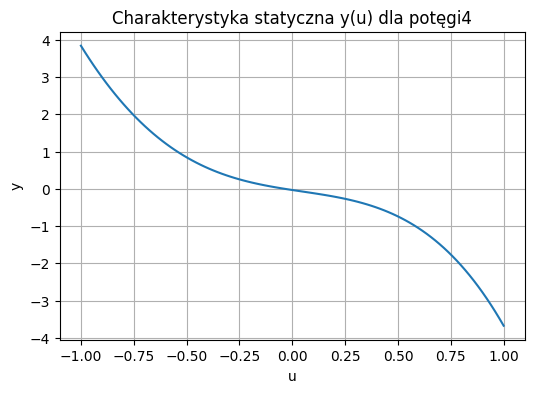

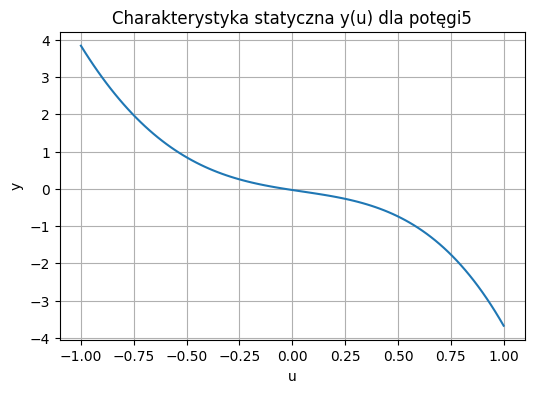

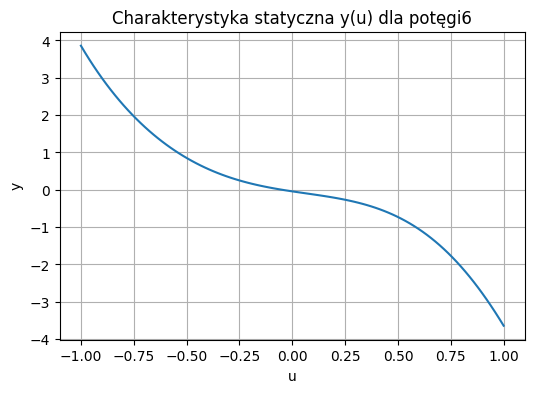

In [14]:
u_vals=np.linspace(-1,1,100)
for n in range(0, N):
    def func(x):
        val=a[0,n]
        for i in range(1,N+1):
            val = val+a[i,n]*x**i
        return val
    
    plt.figure(figsize=(6, 4))
    plt.plot(u_vals,np.vectorize(func)(u_vals))
    
    plt.title('Charakterystyka statyczna y(u) dla potęgi'+str(n+1))
    plt.xlabel('u')
    plt.ylabel('y')
    plt.grid(True)
    path='wykresy/char_stat_nlin'+str(n+1)+'.png'
    plt.savefig(path,dpi=300)
    plt.show()

#### Generowanie wykresów dla zbioru uczącego

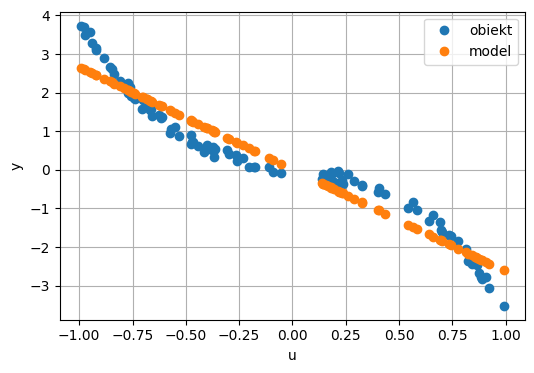

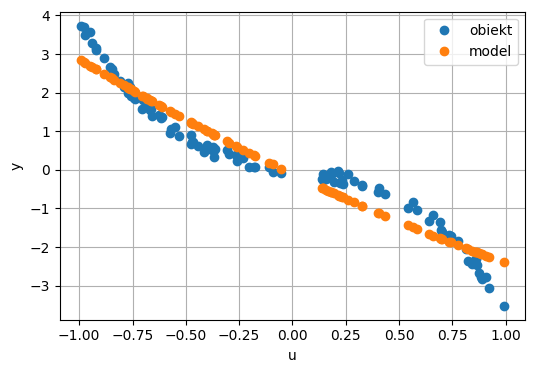

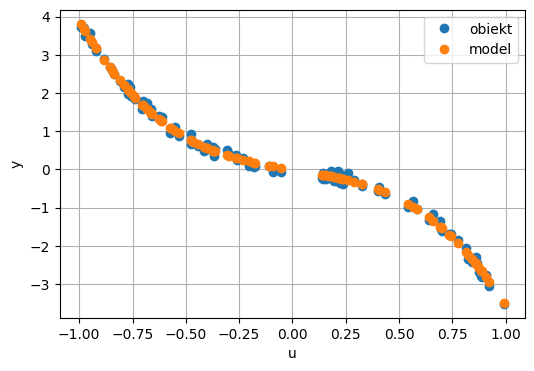

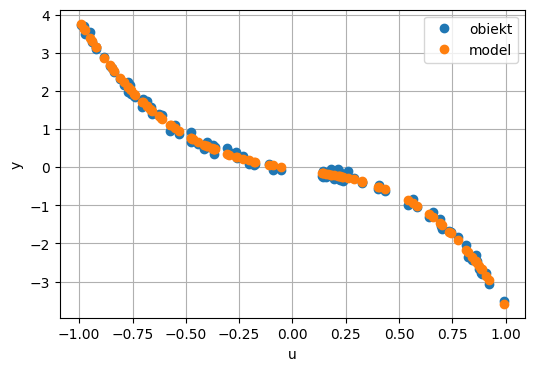

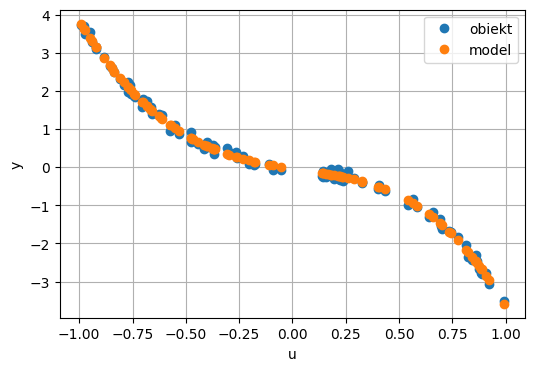

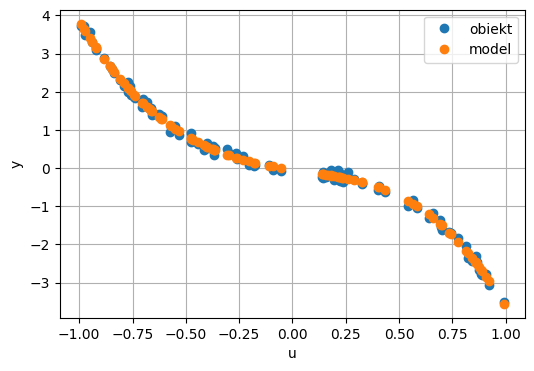

In [15]:
for n in range(0, N):
    def func(x):
        val=a[0,n]
        for i in range(1,N+1):
            val = val+a[i,n]*x**i
        return val

    plt.figure(figsize=(6, 4))
    plt.plot(dane_ucz[:,0],dane_ucz[:,1], 'o', label='obiekt')
    plt.plot(dane_ucz[:,0],np.array([func(x) for x in dane_ucz[:,0]]).T, 'o', label='model')
    # plt.title('Wykres modelu i obiektu zbioru uczącego dla potęgi '+str(n+1))
    plt.xlabel('u')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    path='wykresy/model_stat_nlin_dane_ucz_pow_'+str(n+1)+'.png'
    plt.savefig(path,dpi=300)
    plt.show()

#### Generowanie wykresów dal zbioru weryfikującego

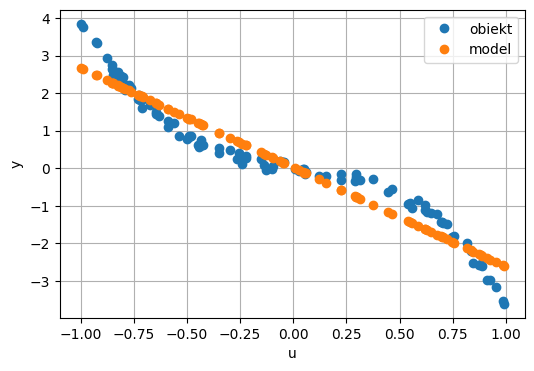

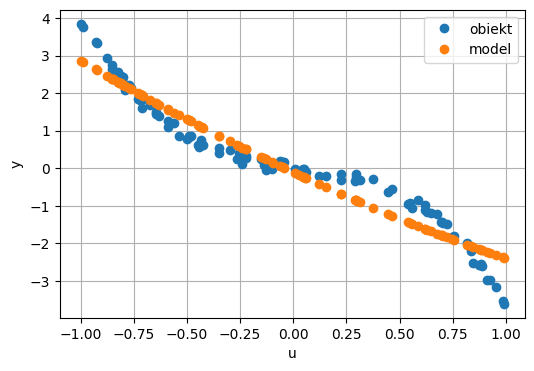

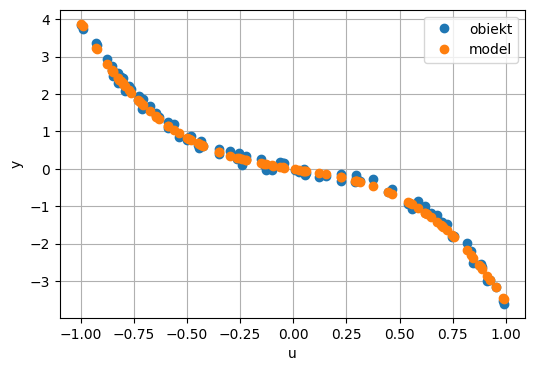

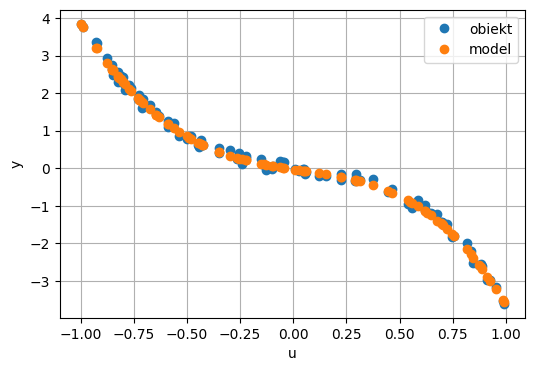

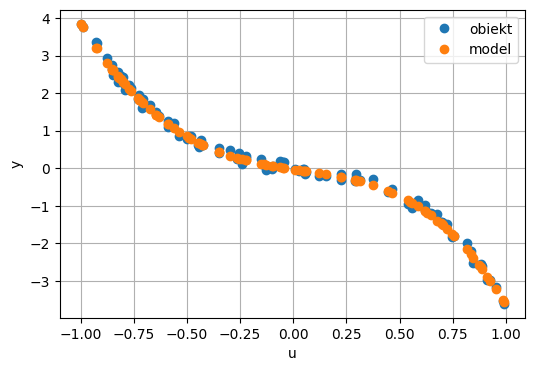

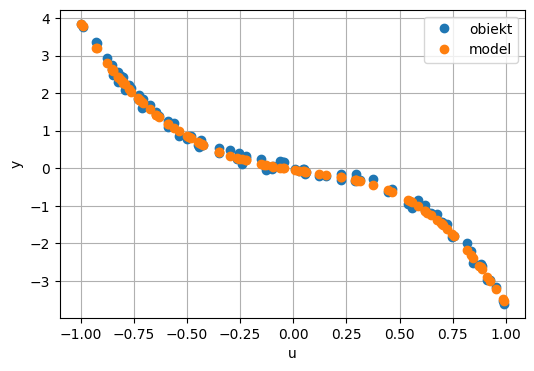

In [16]:
for n in range(0, N):
    def func(x):
        val=a[0,n]
        for i in range(1,N+1):
            val = val+a[i,n]*x**i
        return val

    plt.figure(figsize=(6, 4))
    plt.plot(dane_wer[:,0],dane_wer[:,1], 'o', label='obiekt')
    plt.plot(dane_wer[:,0],np.array([func(x) for x in dane_wer[:,0]]).T, 'o', label='model')
    # plt.title('Wykres modelu i obiektu zbioru weryfikującego dla potęgi '+str(n+1))
    plt.xlabel('u')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    path='wykresy/model_stat_nlin_dane_wer_pow_'+str(n+1)+'.png'
    plt.savefig(path,dpi=300)
    plt.show()